In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('transaction.csv')
dataset

,InvoiceNo,StockCode,Qty,InvoiceDate,CustomerID,Country
0,537626,22725,830,12/7/2010 14:57,12347,Iceland
1,537626,22729,948,12/7/2010 14:57,12347,Iceland
2,537626,22195,695,12/7/2010 14:57,12347,Iceland
3,542237,22725,636,1/26/2011 14:30,12347,Iceland
4,542237,22729,536,1/26/2011 14:30,12347,Iceland
...,...,...,...,...,...,...
10541,543911,21700,455,2/14/2011 12:46,17829,United Arab Emirates
10542,543911,22111,578,2/14/2011 12:46,17829,United Arab Emirates
10543,543911,22112,163,2/14/2011 12:46,17829,United Arab Emirates
10544,564428,23296,545,8/25/2011 11:27,17844,Canada


In [3]:
dataset['Year'] = pd.DatetimeIndex(dataset['InvoiceDate']).year
dataset['Month'] = pd.DatetimeIndex(dataset['InvoiceDate']).month
dataset = dataset[dataset['Year'] == 2011]
dataset = dataset.drop_duplicates(subset='InvoiceNo', keep='first')
dataset

,InvoiceNo,StockCode,Qty,InvoiceDate,CustomerID,Country,Year,Month
3,542237,22725,636,1/26/2011 14:30,12347,Iceland,2011,1
8,549222,23076,383,4/7/2011 10:43,12347,Iceland,2011,4
14,556201,23171,135,6/9/2011 13:01,12347,Iceland,2011,6
19,562032,23308,490,8/2/2011 8:48,12347,Iceland,2011,8
27,573511,47559,922,10/31/2011 12:25,12347,Iceland,2011,10
...,...,...,...,...,...,...,...,...
10515,559557,22398,948,7/11/2011 10:33,17444,Canada,2011,7
10529,545579,20723,822,3/4/2011 8:10,17508,Greece,2011,3
10531,555931,21733,580,6/8/2011 8:31,17828,Malta,2011,6
10535,543911,21485,469,2/14/2011 12:46,17829,United Arab Emirates,2011,2


In [4]:
from sklearn.cluster import KMeans

In [5]:
transaksi_tinggi = []

In [6]:
for i in range(1,13):
    data_bulan = dataset[dataset['Month'] == i]
    transaction = pd.DataFrame(data_bulan['Country'].value_counts())
    clustering = KMeans(n_clusters=3).fit(transaction)
    clusters=clustering.labels_
    centroid = clustering.cluster_centers_
    
    sortedIndex = np.argsort(centroid.sum(axis=1))
    zeroArray = np.zeros_like(sortedIndex)
    zeroArray[sortedIndex] = np.arange(3)
    sortedCentroid =centroid[zeroArray]
    sortedLabel = zeroArray[clusters]
    
    label_2 = (sortedLabel == 2).nonzero()
    countryHigh = transaction.index[label_2]
    
    temp = []
    for item in countryHigh:
        temp.append(transaction['Country'][item])
        
    transaksi_tinggi.append(temp)
        

In [7]:
transaksi_tinggi

[[28, 26],
 [20, 18],
 [26, 23, 17],
 [21],
 [34, 33],
 [28, 20, 20],
 [29],
 [29, 24],
 [43],
 [47],
 [58, 52],
 [16, 15]]

In [8]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
averageTransaction = []

for item in transaksi_tinggi:
    average = sum(item) / len(item)
    averageTransaction.append(average)

averageTransaction

[27.0,
 19.0,
 22.0,
 21.0,
 33.5,
 22.666666666666668,
 29.0,
 26.5,
 43.0,
 47.0,
 55.0,
 15.5]

In [10]:
month = []
for i in range(1,13):
    month.append(i)

month

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

Text(0, 0.5, 'y')

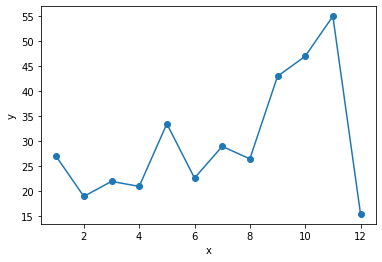

In [11]:
x=month
y=averageTransaction
plt.scatter(x, y)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')

In [12]:
linreg=LinearRegression()
x=np.array(x).reshape(-1,1)
linreg.fit(x, y)

LinearRegression()

In [13]:
next_x=13
next_x=np.array(next_x).reshape(-1,1)
pred_x=linreg.predict(next_x)

In [14]:
print('\nPrediksi x \n', pred_x.item())


Prediksi x 
 40.72979797979798


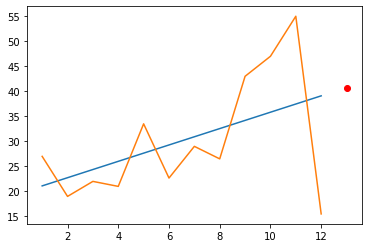

In [15]:
plt.scatter(next_x, pred_x, c='red')
pred_y=linreg.predict(x)
plt.plot(x, pred_y)
plt.plot(x, y)
plt.show()